# Challenge 4 - Homework
**Abate Kevin Pio**: 10812892

**Pigato Lorenzo**: 10766953 [Team Leader]
# Exercise 3 - RFID
A **RFID** system based on **Dynamic Frame ALOHA** is composed of $N=4$ tags
#### 1 - Find collision resolution efficiency

> Find the overall collision resolution efficiency η in the different cases in which the initial frame size is set to $r1=1,2,3,4,5,6$
	• Assume that after the first frame, the frame size is correctly set to the current backlog size
	• Assume as given the duration of the arbitration period with $N=2,3$ tags when $r=N$ ($L2=4, L3=51/8$)

Create a function to calculate probability of $S$ packages succeding with $r$ available slots: 

In [27]:
from itertools import product
from collections import Counter

def probability_success(N, r, s):

    total = 0
    favorable = 0

    # Geenerate every possible packet position in r slots
    for assignment in product(range(r), repeat=N):
        total += 1
        counts = Counter(assignment)

        # Count packets in unique slots
        successful = sum(1 for slot in assignment if counts[slot] == 1)
        if successful == s:
            favorable += 1

    return favorable / total if total > 0 else 0.0


Define a funtion to calculate the **arbitration time** given a $r$ and $n$ values:

$L_n = r + \sum_{i=0}^{n-1} P(S = i) \cdot L_{n - i}$

This, for the specific case, implies that:

${L^*}_4 = r_1 + \sum_{i=0}^{3} P(S = i) \cdot L_{4 - i}$

${L}_4 = {\frac{1}{1-P(S=0)}} \cdot {(4 + \sum_{i=1}^{3} P(S = i))}$

In [28]:
def expected_arbitration_time(n, r, L_dict):
    
    # ---- L4 ------
    if(n==r):
        expected_time = r
        for i in range (1,4):
            probability = probability_success(n,r,i)
            expected_time += probability * L_dict[n-i]
        
        expected_time /= (1 - probability_success(n, r, 0))
        return expected_time
    
    # ---- L4* -----
    else:
        expected_time = r + (expected_arbitration_time(4, 4, L_dict) * probability_success(n, r, 0))
        for i in range (1,4):
            probability = probability_success(n,r,i)
            expected_time += probability * L_dict[n-i]
        return expected_time

**Efficiency** is calulated as: $\frac{N}{{L^*}_4}$

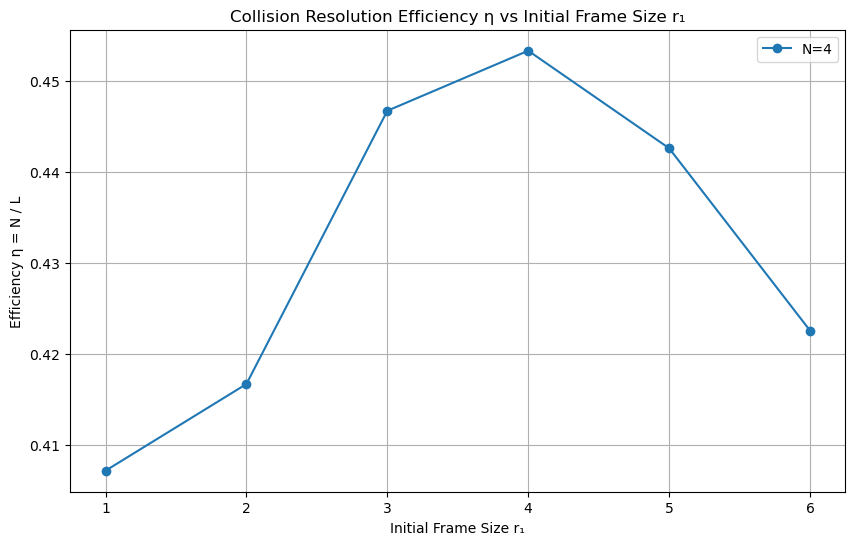

,r₁,η
0,1,0.4072
1,2,0.4167
2,3,0.4467
3,4,0.4533
4,5,0.4426
5,6,0.4226


In [29]:
import matplotlib.pyplot as plt

def efficiency(N, r1, L_dict):
    L_star = expected_arbitration_time(N, r1, L_dict)
    return N / L_star

# --- ARBITRATION DURATIONS ---
# L2 and L3 are given for Dynamic Frame Aloha in case N=r
L_dict = {
    1: 1,         
    2: 4,
    3: 51 / 8
}

r_values = [1, 2, 3, 4, 5, 6]
efficiencies = [efficiency(4, r, L_dict) for r in r_values]

# --- PLOT RESULTS ---
plt.figure(figsize=(10, 6))
plt.plot(r_values, efficiencies, marker='o', label='N=4')
plt.title("Collision Resolution Efficiency η vs Initial Frame Size r₁")
plt.xlabel("Initial Frame Size r₁")
plt.ylabel("Efficiency η = N / L")
plt.grid(True)
plt.legend()
plt.show()

# --- TABLE ---
import pandas as pd

df = pd.DataFrame({
    "r₁": r_values,
    "η": [round(e, 4) for e in efficiencies]
})
df


It's possible to notice how the **maximum efficiency** is obtained when the initial frame size $r$ is equal to the number of tags to read $N$. This creates an optimal balance between collision probability and the wasting of slots. An excessive amount of collisions occur when the number of slots is too little as multiple tags compete for the same slots, while with more slots than tags there are too many empty slots.

This also coincides with the maximum efficiency of single-frame ALOHA, which is also achieved when $r=N$